<a href="https://colab.research.google.com/github/Nyandwi/tf_vision/blob/main/Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Fast Neural Style Transfer

In this practice working with TensorFlow hub, a repo of trained models for various problem domains (such as images, texts, video, sounds...), the aim is to implement the paper `Exploring the structure of a real-time, arbitrary neural artistic stylization network`. 

Since its's already part of TF Hub open source models, we can take such advantages and use it directly in style transfer. The paper is available [here](https://arxiv.org/abs/1705.06830). 

Other prior papers that are associated with style transfer:

* [A Neural Algorithm of Artistic Style](https://arxiv.org/abs/1508.06576), 2015. 
* [Perceptual Losses for Real-Time Style Transfer 
and Super-Resolution](https://cs.stanford.edu/people/jcjohns/eccv16/), 2016
* [Visualizing and Understanding Convolutional Networks](https://arxiv.org/pdf/1311.2901.pdf), 2013

## Structure of the practice

* *Importing all relevant libraries*
* *Image processing functions*
* *Downloading the style images*
* *Downloading the model from the TF Hub*
* *Applying the style to the content image*


## 1. Importing all relevant libraries

In [25]:
import tensorflow as tf # Deep learning framework
import tensorflow_hub as hub # Repo of trained computer vision and NLP models
import matplotlib.pyplot as plt # For visualization
import numpy as np # for array manipulation


## 2. Image processing functions

### Converting tensor to image

In [39]:
def tensor_to_image(tensor):
  tensor_shape = tf.shape(tensor)
  number_elem_shape = tf.shape(tensor_shape)
  if number_elem_shape > 3:
    assert tensor_shape[0] == 1
    tensor = tensor[0]

  image = tf.keras.preprocessing.image.array_to_img(tensor)

  return image

### Loading the image

In [27]:
def load_img (image_path):

  max_dim = 512
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image, tf.float32)

  shape = np.shape(image)[:-1]
  shape = tf.cast(np.shape(image)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  image = tf.image.resize(image, new_shape)
  image = image[tf.newaxis, :]
  image = tf.image.convert_image_dtype(image, tf.uint8)

  return image


### Loading Style and Content Images

Style image: Image having a style to transfer 

Content image: Image to be styled

In [28]:
def load_content_style_images(content_path, style_path):

  content_image = load_img ("{}".format(content_path))
  style_image = load_img("{}".format(style_path))

  return content_image, style_image

### Visualizing Image

In [29]:
def imshow (image, title=None):

  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)


def show_images_with_objects (images, titles = []):

  if len(images) != len(titles):
    return

  plt.figure (figsize=(20, 12))

  for idx, (image, title) in enumerate(zip(images, titles)):

    plt.subplot(1, len(images), idx + 1)
    plt.xticks ([])
    plt.yticks([])
    imshow(image, title)

## 3. Downloading the style and content images

In [51]:
IMAGE_DIR = 'images'

# create directory
!mkdir {IMAGE_DIR}

# download images to the directory you just created

!wget -q -O ./images/Delacroix.jpg https://upload.wikimedia.org/wikipedia/commons/a/a7/Eug%C3%A8ne_Delacroix_-_La_libert%C3%A9_guidant_le_peuple.jpg
!wget -q -O ./images/lajas.jpg https://upload.wikimedia.org/wikipedia/commons/a/a3/Santuario_de_Las_Lajas%2C_Ipiales%2C_Colombia%2C_2015-07-21%2C_DD_21-23_HDR.jpg
!wget -q -O ./images/Shirakawago.jpg https://upload.wikimedia.org/wikipedia/commons/0/06/Shirakawago.jpg
!wget -q -O ./images/Salvador.JPG https://upload.wikimedia.org/wikipedia/commons/3/3d/Iglesia_de_San_Salvador%2C_Torla%2C_Huesca%2C_Espa%C3%B1a%2C_2015-01-07%2C_DD_02.JPG
!wget -q -O ./images/highland.jpg https://upload.wikimedia.org/wikipedia/commons/7/7c/Scottish-highland-cattle-1-style.jpg
!wget -q -O ./images/painting.jpg https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg

print("image files you can choose from: ")

!ls images

mkdir: cannot create directory ‘images’: File exists
image files you can choose from: 
Delacroix.jpg  lajas.jpg     Sabine.jpg    Shirakawago.jpg
highland.jpg   painting.jpg  Salvador.JPG


In [57]:
# Choosing content and style image

content_path = f'{IMAGE_DIR}/lajas.jpg'
style_path = f'{IMAGE_DIR}/Shirakawago.jpg'

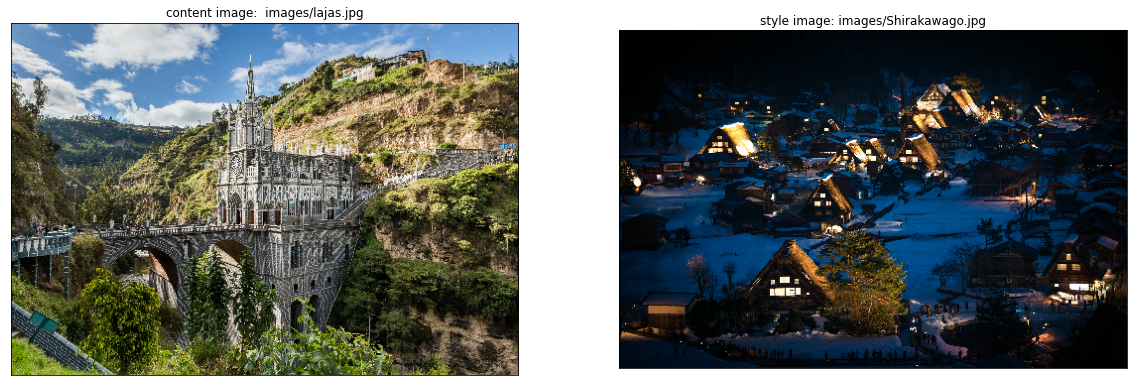

In [58]:
## displaying the content and the style image

content_image, style_image = load_content_style_images(content_path, style_path)

show_images_with_objects([content_image, style_image], 
                         titles = [f'content image:  {content_path}',
                                   f'style image: {style_path}' ])

## 4. Downloading the model from the TF Hub

In [35]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

## 5. Applying the style to the content image

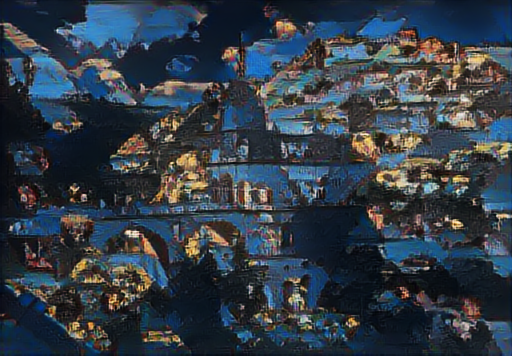

In [59]:
stylized_image = hub_module(
                        tf.image.convert_image_dtype(content_image, tf.float32),
                        tf.image.convert_image_dtype(style_image, tf.float32))[0]
                      

# convert tensor to image

tensor_to_image(stylized_image)

## Try more other images!! It's only changing the `content_path` and `style_path`. 



```
Credits:

* DeepLearning.AI TensorFlow Advanced Course 
* TF Hub Fast Neural Transfer
```

